# Group 2

#### Members:
* Diego Gómez (20171738)
* Alexander Pacheco (20161901)

# Question 1


Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. Examples of correlated predictor variables (also called multicollinear predictors) are: a person’s height and weight, age and sales price of a car, or years of education and annual income. This problem can become a serious one when perfect multicollinearity occurs: it happens when an independent variable is a linear combination of two other independent variables.

For example:

$$ Investment_i = \beta_0+\beta_1GPD +\beta_2GovermentSpending +\beta_3Consumption+\beta_4Savings\epsilon_i$$
Perfect multicollinearity will occur if we can express: $Savings = GPD − GovermentSpending - Consumption$
In this case, $\beta_4$ will not be able to measure the effect of increasing the balance by keeping the export and import constant given their linear relationship.

The main consequence is that we will not be able to find the following expression: $\beta_{OLS} = (X'X)^{−1}X'y$ ; that because $rango(X)&lt;K ⇒ |X'X| = 0 ⇒ \not\exists (X'X)^{-1}$ where K in the number of variables.



In [69]:
import pandas as pd
import numpy as np

In [87]:
np.random.seed(1)
# We define the next square matrix 10x10 with a normal stándar distribution
matrix = np.random.normal(0,6, size = (10,10))
matrix = pd.DataFrame(matrix)
# We then rename the columsn and define the column 10 as a linear combination of the 7, 8 and 9 columns 
matrix = matrix.rename(columns = {0: 'v1', 1: 'v2', 2: 'v3', 3 : 'v4', 4: 'v5', 5: 'v6', 6: 'v7', 7 : 'v8', 8 : 'v9', 9: 'v10'})
matrix['v10'] = matrix['v7'] + matrix['v8']+matrix['v9']
matrix

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,9.746072,-3.670538,-3.169031,-6.437812,5.192446,-13.809232,10.468871,-4.567241,1.914235,7.815864
1,8.772648,-12.360844,-1.934503,-2.304326,6.802617,-6.599348,-1.034569,-5.267151,0.253282,-6.048437
2,-6.603715,6.868342,5.409544,3.014966,5.405136,-4.102367,-0.737341,-5.614617,-1.607328,-7.959286
3,-4.149965,-2.380521,-4.123036,-5.071234,-4.027477,-0.075988,-6.703862,1.406494,9.958813,4.661445
4,-1.151013,-5.325774,-4.482950,10.154728,0.304847,-3.821974,1.145493,12.601531,0.720954,14.467977
5,1.801022,-2.113499,-6.855109,-2.096056,-1.253365,3.519739,5.033900,5.586612,1.713524,12.334037
6,-4.526388,7.517209,3.077579,-1.788557,2.931109,-0.453430,6.789776,9.118901,13.113452,29.022130
7,-8.664683,-3.026795,0.960222,5.257014,1.893810,-12.133207,-1.837224,4.967848,1.380568,4.511192
8,-1.333969,-1.204548,1.119368,2.460310,1.189798,0.714052,-4.023974,2.265383,0.730928,-1.027663
9,7.193507,1.110939,-2.251710,-3.832382,2.540966,0.464040,-2.063122,0.261581,-3.720005,-5.521546


In [88]:
# Now we calculate the determinant of the matrix in order to analyze the inverse matrix
np_matrix = matrix.values
determinant_matrix= np.linalg.det(np_matrix)
determinant_matrix

-2.722779709465462e-06

#### We realize that the determinant of the matrix is really close to zero. This must indicates that we are dealing with a singular matrix

In [89]:
# Now we try to calculate the inverse of the matrix
inverse_matrix = pd.DataFrame(np.linalg.inv(matrix.values))
inverse_matrix

,0,1,2,3,4,5,6,7,8,9
0,-1.770543e-02,-3.560181e-04,-2.677815e-02,1.643804e-02,7.574665e-02,-9.156465e-02,-2.197351e-02,-7.934859e-02,-3.040956e-01,1.148604e-01
1,6.717628e-02,-1.237826e-01,6.296232e-02,2.740646e-02,4.071839e-02,1.563153e-02,-4.390576e-02,-5.986616e-02,2.254923e-01,1.062708e-01
2,-8.476553e-02,9.887863e-02,-1.154328e-01,-6.296468e-02,-5.528744e-02,-1.324708e-01,7.439969e-02,6.132313e-02,-5.485809e-01,-1.759966e-02
3,6.841555e-02,-5.557854e-02,6.769375e-02,2.733401e-02,1.113074e-01,-4.611211e-02,-4.219950e-02,-1.266955e-01,1.146115e-01,-6.005844e-02
4,3.409008e-02,2.096522e-02,8.796384e-02,-2.646701e-02,-4.689256e-02,1.317954e-01,8.882299e-03,-2.760244e-03,1.619653e-01,1.704504e-02
5,-5.399452e-02,3.599635e-02,1.349863e-02,-1.574840e-02,-1.799817e-02,4.499544e-02,8.999087e-03,-3.599635e-02,-7.199270e-02,-2.699726e-02
6,-2.690849e+14,2.158479e+14,1.540176e+13,3.591836e+13,1.319032e+14,-1.728202e+14,1.148007e+14,4.034335e+13,-9.007199e+14,1.543711e+14
7,-2.690849e+14,2.158479e+14,1.540176e+13,3.591836e+13,1.319032e+14,-1.728202e+14,1.148007e+14,4.034335e+13,-9.007199e+14,1.543711e+14
8,-2.690849e+14,2.158479e+14,1.540176e+13,3.591836e+13,1.319032e+14,-1.728202e+14,1.148007e+14,4.034335e+13,-9.007199e+14,1.543711e+14
9,2.690849e+14,-2.158479e+14,-1.540176e+13,-3.591836e+13,-1.319032e+14,1.728202e+14,-1.148007e+14,-4.034335e+13,9.007199e+14,-1.543711e+14


#### We show that the inverse of the matrix can be calculated even when it is a singular matrix (determinant=0). This is due to the methology that Python uses to calculate the inverse of the matrix. We cannot have the same results in R because it recognizes that a singular matrix is an obstacle to calculate its inverse. This fact generates problems when estimating models in Python, since despite the multicollinearity problems, the software can estimate parameters, while R eliminates the variables that cause multicollinearity.

# Question 2

## Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

In [1]:
import pandas as pd
import pyreadr

In [3]:
# Importing the data
Penn = pd.read_csv("C:/Users/Hp/OneDrive/Documentos/GitHub/ECO224/Labs/data/penn_jae.dat" , sep='\s', engine='python')

In [4]:
# Defining the number of observations "n"
n = Penn.shape[0]
n

13913

In [5]:
# Defining the number of coulmns
p_1 = Penn.shape[1]
p_1

24

In [6]:
# We focus now on the treatment group 2
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13900,10845,0,6,6,1,0,0,1,2,0,...,0,0,0,0,0,1,0,0,1,NaN
13901,10705,2,14,14,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN
13906,10558,0,9,9,0,0,0,0,2,0,...,0,0,1,0,0,0,1,0,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN


In [7]:
# Variables description
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [8]:
# We rename the dependent variable as "T2" and indicate it as int variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# We define the dep variable as a category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [9]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

### Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

In [ ]:
import matplotlib.pyplot as plot

edades = [12, 15, 13, 12, 18, 20, 19, 20, 13, 12, 13, 17, 15, 16, 13, 14, 13, 17, 19]

intervalos = range(min(edades), max(edades) + 2) #calculamos los extremos de los intervalos

plot.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de edades - matplotlib - codigopiton.com')
plot.xlabel('Edades')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma


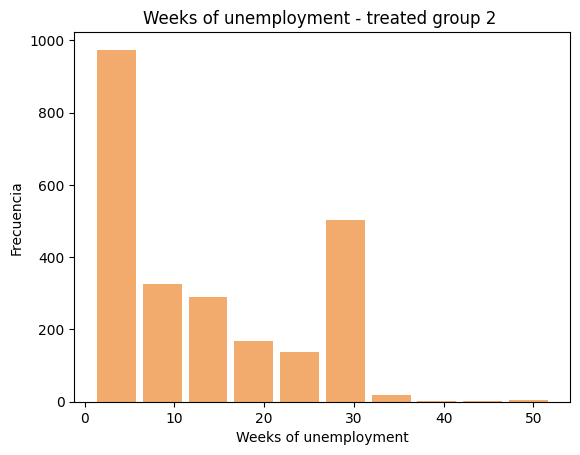

In [56]:
import matplotlib.pyplot as plot

Penn_trt = Penn[Penn['T2']==1]

Penn_ctrl = Penn[Penn['T2']==0]

plot.hist(x=Penn_trt['inuidur1'], color='#F2AB6D', rwidth=0.85)
plot.title('Weeks of unemployment - treated group 2 ')
plot.xlabel('Weeks of unemployment')
plot.ylabel('Frecuencia')
plot.show()

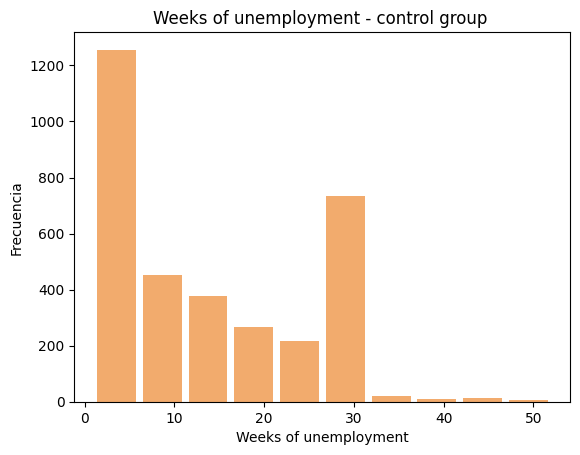

In [57]:
plot.hist(x=Penn_ctrl['inuidur1'], color='#F2AB6D', rwidth=0.85)
plot.title('Weeks of unemployment - control group ')
plot.xlabel('Weeks of unemployment')
plot.ylabel('Frecuencia')
plot.show()

### Analysis

We consider 

1.  Classical 2-sample approach, no adjustment (CL)
2.  Classical linear regression adjustment (CRA)
3.  Interactive regression adjusment (IRA)
4.  Interactive regression adjustment (IRA) using Lasso
 

In [10]:
# For this task, we import some relevant packages
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

### We regress treatment on all covariates to check balance condition

In [31]:
# The model contains the next specification 
# model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
# We import the data from R
result = pyreadr.read_r("D:/Clases 2021-2/Estadística Aplicada/datos/m_reg_t2.RData")
X_vars = result['X1']

model_results = sm.OLS( y, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     4.204
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.42e-39
Time:                        14:10:31   Log-Likelihood:                -4075.6
No. Observations:                5782   AIC:                             8357.
Df Residuals:                    5679   BIC:                             9043.
Df Model:                         102                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              0.5171 

C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 101
  'rank is %d' % (J, J_), ValueWarning)


We see that the balance conditions are failed. This is caused by the strong multicollinearity between covariates

# Model Specifications

### 1. Classical 2-sample approach, no adjustment (CL)

In [24]:
# We take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")
print(ols_cl.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0154
Time:                        13:08:57   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

### 2. Classical linear regression adjustment (CRA)

In [47]:
# adding controls
# formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

#getting data
# Get data from R
result_cra = pyreadr.read_r('D:/Clases 2021-2/Estadística Aplicada/datos/ols_cra_reg_t2.RData')
X_vars = result_cra['X1']

ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 

print(ols_cra_2.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     84.52
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:07:14   Log-Likelihood:                -9180.6
No. Observations:                5782   AIC:                         1.857e+04
Df Residuals:                    5678   BIC:                         1.926e+04
Df Model:                         103                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              2.4472 

### 3. Interactive regression adjusment (IRA)

The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [33]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [49]:
# Reset index to estimation
# Get data from R
result_ira = pyreadr.read_r('D:/Clases 2021-2/Estadística Aplicada/datos/ols_cra_reg_t2.RData')
X_vars = result_ira['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:08:40   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  'rank is %d' % (J, J_), ValueWarning)


### 4. Interactive regression adjustment (IRA) using Lasso

In [41]:
import hdmpy as hdm

Next we try out partialling out with lasso

In [50]:
# Get data from R
result = pyreadr.read_r('D:/Clases 2021-2/Estadística Aplicada/datos/rlasso_ira_reg_t2.RData')
X_vars = result['S']

In [51]:
result = hdm.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074573,0.032104,-2.322841,0.020188


### Results

In [52]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["$CL$", "$CRA$", "$IRA$", "$IRA Lasso$"], \
                      index = ["estimate","standard error"])
table2
table2.to_latex
print(table2.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      \$CL\$ &     \$CRA\$ &     \$IRA\$ &  \$IRA Lasso\$ \\
\midrule
estimate       & -0.078825 & -0.071207 & -0.069904 &    -0.074573 \\
standard error &  0.032509 &  0.032044 &  0.032076 &     0.032104 \\
\bottomrule
\end{tabular}



C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  'rank is %d' % (J, J_), ValueWarning)


Treatment group 2 experiences an average decrease of about $7.4\%$ in the length of unemployment spell.
Essentially all methods have very similar standard errors.


# Question 3

Using the 3. interactive regression adjustment (IRA) plot the coefficients of the next variables
* T2*female
+ T2*black
+ T2*agelt35
+ T2*factor(dep)1 Please comment this figure and try to give an explanation for the coefficients.

In [100]:
import matplotlib.pyplot as plt

In [98]:
X_ira_variables = ['T2:Female', 'T2:Black', 'T2:Agelt35', 'T2:factor1']
Y_ira_coef = [ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfemale'],  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xblack'], ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xagelt35'], ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfactor(dep)1']]

In [104]:
ira_coefs = [X_ira_variables, Y_ira_coef]
ira_coefs = pd.DataFrame(ira_coefs)

In [105]:
fig, ax = plt.subplots(figsize=(8, 5))
ira_coefs.plot(x='X_ira_variables', y='Y_ira_coef', kind='bar', 
             ax=ax, color='none', 
             yerr='Interval', legend=False)
plt.show()

KeyError: 'X_ira_variables'